In [1]:
#a1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def load_data(file_path, sheet_name='Sheet1'):
    """Load dataset from an Excel file."""
    data = pd.read_excel(file_path, sheet_name=sheet_name)
    return data

def prepare_data(data, feature_col, target_col):
    """Prepare feature and target data."""
    X = data[feature_col].values.reshape(-1, 1)
    y = data[target_col]
    return X, y

def train_linear_regression(X_train, y_train):
    """Train a linear regression model."""
    reg = LinearRegression().fit(X_train, y_train)
    return reg

def evaluate_model(reg, X_train, y_train):
    """Evaluate the linear regression model."""
    y_train_pred = reg.predict(X_train)
    return {
        "coefficients": reg.coef_,
        "intercept": reg.intercept_,
        "predictions": y_train_pred[:5],
        "actual_values": y_train[:5].values
    }

def main():
    # File path and column names
    file_path = r"C:\\Users\srivar\\Desktop\\Feature Extraction using TF-IDF.xlsx"
    feature_col = 'signal'
    target_col = 'rank'
    
    # Load data
    data = load_data(file_path)
    
    # Prepare data
    X, y = prepare_data(data, feature_col, target_col)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Train model
    reg = train_linear_regression(X_train, y_train)
    
    # Evaluate model
    results = evaluate_model(reg, X_train, y_train)
    
    # Output results
    print(f"Model Coefficient: {results['coefficients']}")
    print(f"Model Intercept: {results['intercept']}")
    print(f"First few predictions on the training set: {results['predictions']}")
    print(f"First few actual target values: {results['actual_values']}")

if __name__ == "__main__":
    main()


Model Coefficient: [-0.08537945]
Model Intercept: 0.04256222756312906
First few predictions on the training set: [0.04256223 0.04256223 0.04256223 0.01273161 0.04256223]
First few actual target values: [0.         0.         0.54971437 0.         0.        ]


In [2]:
#a2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def load_data(file_path, sheet_name='Sheet1'):
    """Load dataset from an Excel file."""
    data = pd.read_excel(file_path, sheet_name=sheet_name)
    return data

def prepare_data(data, feature_col, target_col):
    """Prepare feature and target data."""
    X = data[feature_col].values.reshape(-1, 1)
    y = data[target_col]
    return X, y

def train_linear_regression(X_train, y_train):
    """Train a linear regression model."""
    reg = LinearRegression().fit(X_train, y_train)
    return reg

def calculate_metrics(y_true, y_pred):
    """Calculate regression metrics."""
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    mape = (mean_absolute_error(y_true, y_pred) / y_true.mean()) * 100
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mape, r2

def main():
    # File path and column names
    file_path = r"C:\\Users\srivar\\Desktop\\Feature Extraction using TF-IDF.xlsx"
    feature_col = 'signal'
    target_col = 'rank'
    
    # Load data
    data = load_data(file_path)
    
    # Prepare data
    X, y = prepare_data(data, feature_col, target_col)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Train model
    reg = train_linear_regression(X_train, y_train)
    
    # Predict on the training and test sets
    y_train_pred = reg.predict(X_train)
    y_test_pred = reg.predict(X_test)
    
    # Calculate metrics
    mse_train, rmse_train, mape_train, r2_train = calculate_metrics(y_train, y_train_pred)
    mse_test, rmse_test, mape_test, r2_test = calculate_metrics(y_test, y_test_pred)
    
    # Output metrics
    print("Training Set Metrics:")
    print(f"MSE: {mse_train}")
    print(f"RMSE: {rmse_train}")
    print(f"MAPE: {mape_train}")
    print(f"R²: {r2_train}\n")

    print("Test Set Metrics:")
    print(f"MSE: {mse_test}")
    print(f"RMSE: {rmse_test}")
    print(f"MAPE: {mape_test}")
    print(f"R²: {r2_test}")

if __name__ == "__main__":
    main()


Training Set Metrics:
MSE: 0.02369763993066128
RMSE: 0.15394037784370052
MAPE: 187.76569070805138
R²: 0.005866094005245515

Test Set Metrics:
MSE: 0.021870335975701823
RMSE: 0.1478862264570363
MAPE: 243.52296762863742
R²: -0.009157124710627906


In [3]:
#a4
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

def load_data(file_path, sheet_name='Sheet1'):
    """Load dataset from an Excel file."""
    data = pd.read_excel(file_path, sheet_name=sheet_name)
    return data

def prepare_features(data, feature_cols):
    """Prepare feature data for clustering."""
    X = data[feature_cols]
    return X

def perform_kmeans_clustering(X_train, n_clusters=2):
    """Perform K-Means clustering on the data."""
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(X_train)
    return kmeans

def main():
    # File path and feature column names
    file_path = r"C:\\Users\srivar\\Desktop\\Feature Extraction using TF-IDF.xlsx"
    feature_cols = ['signal', 'rank']
    
    # Load data
    data = load_data(file_path)
    
    # Prepare features
    X = prepare_features(data, feature_cols)
    
    # Split data
    X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)
    
    # Perform K-Means clustering
    kmeans = perform_kmeans_clustering(X_train, n_clusters=2)
    
    # Get cluster labels and centers
    cluster_labels_train = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    
    # Output results
    print("Cluster Labels for Training Data:")
    print(cluster_labels_train)

    print("\nCluster Centers:")
    print(cluster_centers)

if __name__ == "__main__":
    main()


Cluster Labels for Training Data:
[0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]

Cluster Centers:
[[-7.63278329e-17  4.29513974e-02]
 [ 4.53837145e-01 -6.93889390e-18]]


In [4]:
#A5
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def load_data(file_path, sheet_name='Sheet1'):
    """Load dataset from an Excel file."""
    data = pd.read_excel(file_path, sheet_name=sheet_name)
    return data

def prepare_features(data, feature_cols):
    """Prepare feature data for clustering."""
    X = data[feature_cols]
    return X

def perform_kmeans_clustering(X_train, n_clusters=2):
    """Perform K-Means clustering on the data."""
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X_train)
    return kmeans

def calculate_clustering_metrics(X_train, kmeans):
    """Calculate clustering metrics."""
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_train, labels)
    ch_score = calinski_harabasz_score(X_train, labels)
    db_index = davies_bouldin_score(X_train, labels)
    return silhouette_avg, ch_score, db_index

def main():
    # File path and feature column names
    file_path = r"C:\\Users\srivar\\Desktop\\Feature Extraction using TF-IDF.xlsx"
    feature_cols = ['signal', 'rank']
    
    # Load data
    data = load_data(file_path)
    
    # Prepare features
    X = prepare_features(data, feature_cols)
    
    # Split data
    X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)
    
    # Perform K-Means clustering
    kmeans = perform_kmeans_clustering(X_train, n_clusters=2)
    
    # Calculate and output metrics
    silhouette_avg, ch_score, db_index = calculate_clustering_metrics(X_train, kmeans)
    
    print(f"Silhouette Score: {silhouette_avg:.4f}")
    print(f"Calinski-Harabasz Score: {ch_score:.4f}")
    print(f"Davies-Bouldin Index: {db_index:.4f}")

if __name__ == "__main__":
    main()


Silhouette Score: 0.8676
Calinski-Harabasz Score: 111.3507
Davies-Bouldin Index: 0.3242


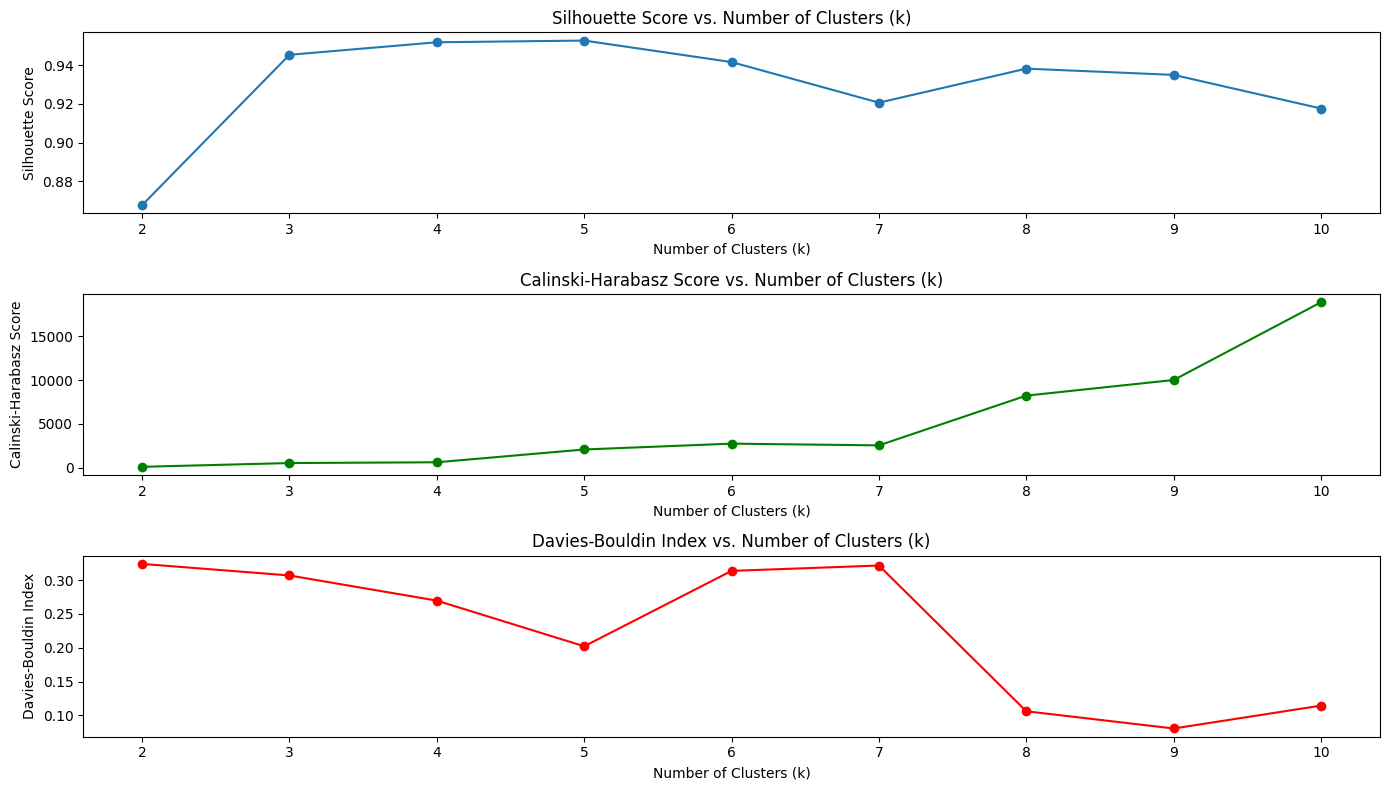

In [5]:
#a6
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

def load_data(file_path, sheet_name='Sheet1'):
    """Load dataset from an Excel file."""
    data = pd.read_excel(file_path, sheet_name=sheet_name)
    return data

def prepare_features(data, feature_cols):
    """Prepare feature data for clustering."""
    X = data[feature_cols]
    return X

def perform_kmeans_clustering(X_train, k):
    """Perform K-Means clustering on the data."""
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train)
    return kmeans

def calculate_clustering_metrics(X_train, kmeans):
    """Calculate clustering metrics."""
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_train, labels)
    ch_score = calinski_harabasz_score(X_train, labels)
    db_index = davies_bouldin_score(X_train, labels)
    return silhouette_avg, ch_score, db_index

def plot_clustering_metrics(k_values, silhouette_scores, ch_scores, db_indices):
    """Plot clustering metrics against k values."""
    plt.figure(figsize=(14, 8))

    plt.subplot(3, 1, 1)
    plt.plot(k_values, silhouette_scores, marker='o')
    plt.title('Silhouette Score vs. Number of Clusters (k)')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')

    plt.subplot(3, 1, 2)
    plt.plot(k_values, ch_scores, marker='o', color='green')
    plt.title('Calinski-Harabasz Score vs. Number of Clusters (k)')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Calinski-Harabasz Score')

    plt.subplot(3, 1, 3)
    plt.plot(k_values, db_indices, marker='o', color='red')
    plt.title('Davies-Bouldin Index vs. Number of Clusters (k)')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Davies-Bouldin Index')

    plt.tight_layout()
    plt.show()

def main():
    # File path and feature column names
    file_path = r"C:\\Users\srivar\\Desktop\\Feature Extraction using TF-IDF.xlsx"
    feature_cols = ['signal', 'rank']
    
    # Load data
    data = load_data(file_path)
    
    # Prepare features
    X = prepare_features(data, feature_cols)
    
    # Split data
    X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)
    
    # Initialize lists to store evaluation scores
    k_values = range(2, 11)
    silhouette_scores = []
    ch_scores = []
    db_indices = []
    
    # Perform clustering for each k value and calculate metrics
    for k in k_values:
        kmeans = perform_kmeans_clustering(X_train, k)
        silhouette_avg, ch_score, db_index = calculate_clustering_metrics(X_train, kmeans)
        silhouette_scores.append(silhouette_avg)
        ch_scores.append(ch_score)
        db_indices.append(db_index)
    
    # Plot metrics
    plot_clustering_metrics(k_values, silhouette_scores, ch_scores, db_indices)

if __name__ == "__main__":
    main()


C:\Users\Nikhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (14) found smaller than n_clusters (15). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\Nikhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (14) found smaller than n_clusters (16). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\Nikhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (14) found smaller than n_clusters (17). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\Nikhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (14) found smaller than n_clusters (18).

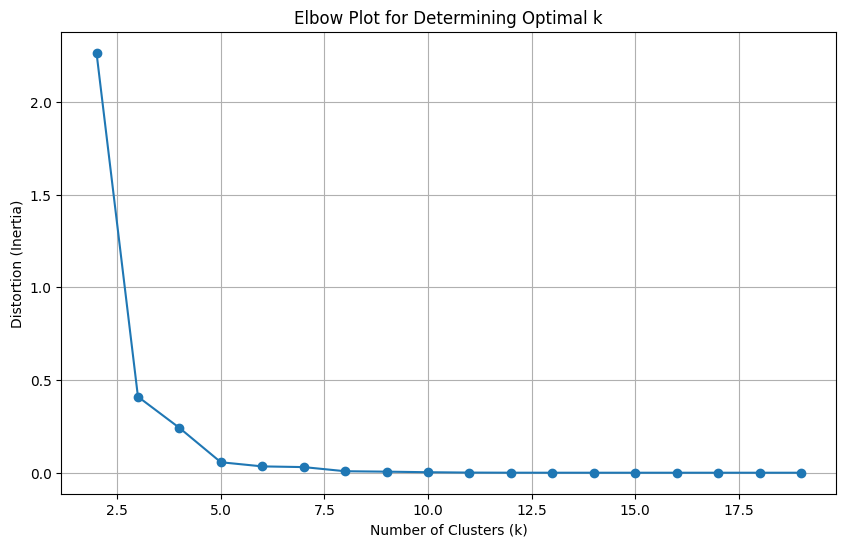

In [6]:
#A7
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\\Users\\srivar\\Desktop\\Feature Extraction using TF-IDF.xlsx"
data = pd.read_excel(file_path, sheet_name='Sheet1')  # Adjust the sheet name if needed

# Extract the 'signal' and 'rank' feature vectors (ignoring the target variable)
X = data[['signal', 'rank']]  # Adjust column names if necessary

# Split the dataset into train and test sets (though for clustering, we typically use all data)
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

# Initialize a list to store the distortions (inertia)
distortions = []

# Calculate the distortions for different k values
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train)
    distortions.append(kmeans.inertia_)  # Inertia measures the within-cluster sum of squares

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(2, 20), distortions, marker='o')
plt.title('Elbow Plot for Determining Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.grid(True)
plt.show()

